In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

##### Read Application Data

In [3]:
Bank_AppData_DF= pd.read_csv('../Resources/CSV/application_data.csv')

In [4]:
# Shape of Application Data
Bank_AppData_DF.shape

(307511, 122)

##### Get Information Application Data

In [5]:
# Getting information about the data type of columns and their count
Bank_AppData_DF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
# Details of Numerical and Categorical data

#numericalTypeColumns---> holds list of columns that are Numerical
#categorialTypeColumns---> holds list of columns that are Categorical

numericalTypeColumns= Bank_AppData_DF.select_dtypes(include=np.number).columns.tolist()
categorialTypeColumns= Bank_AppData_DF.select_dtypes(include=np.object).columns.tolist()
print(f"Numerical: {len(numericalTypeColumns)} \n{numericalTypeColumns}\n\nCategorical: {len(categorialTypeColumns)}\n{categorialTypeColumns}")

Numerical: 106 
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATAT

##### Application Data Cleanup

In [7]:
nullCount=Bank_AppData_DF.isnull().sum()

In [8]:

percentageOfNull= round((nullCount/Bank_AppData_DF.shape[0])*(100),2)
percentageOfNull

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [9]:
#totalColHavingNull---> number of columns having null values
totalColHavingNull=len(Bank_AppData_DF.columns[Bank_AppData_DF.isnull().sum()>0])

In [10]:
# for better understanding the null count and its percentage, creating a separate data frame
nullInfoDataFrame= pd.DataFrame({'Columns':Bank_AppData_DF.columns ,'NullCount':nullCount,'Null %':percentageOfNull})
nullInfoDataFrame

,Columns,NullCount,Null %
SK_ID_CURR,SK_ID_CURR,0,0.0
TARGET,TARGET,0,0.0
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,CODE_GENDER,0,0.0
FLAG_OWN_CAR,FLAG_OWN_CAR,0,0.0
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5


In [11]:
# fixed the index, as it was showing the columns again
nullInfoDataFrame.reset_index(drop=True,inplace=True)
nullInfoDataFrame

,Columns,NullCount,Null %
0,SK_ID_CURR,0,0.0
1,TARGET,0,0.0
2,NAME_CONTRACT_TYPE,0,0.0
3,CODE_GENDER,0,0.0
4,FLAG_OWN_CAR,0,0.0
...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5


In [12]:
# max(percentage of null values)
max(nullInfoDataFrame['Null %'])

69.87

###### Setting Threshold for dropping columns which are having percentage of nulls greater than threshold

In [13]:
# max percentage of null value is around 70%, so we can set our threshold to 40% for deleting the null values
Threshold= 40

In [14]:
# list of columsn to be deleted that are haivng null percentage greater than threshold
deleteColumns= nullInfoDataFrame[nullInfoDataFrame['Null %']>Threshold]['Columns'].tolist()
len(deleteColumns)

49

In [15]:
# deleting the columns which with respect to threshold
Bank_AppData_DF.drop(columns=deleteColumns,inplace=True)

In [16]:
Bank_AppData_DF.shape

(307511, 73)

In [17]:
# Finding out data with null percentage less than threshold
nullInfoDfLessThanThreshold= nullInfoDataFrame[nullInfoDataFrame['Null %']<Threshold]

In [18]:
nullInfoDfLessThanThreshold.sort_values(ascending=False, by='Null %')

,Columns,NullCount,Null %
28,OCCUPATION_TYPE,96391,31.35
43,EXT_SOURCE_3,60965,19.83
121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
...,...,...,...
33,HOUR_APPR_PROCESS_START,0,0.00
34,REG_REGION_NOT_LIVE_REGION,0,0.00
35,REG_REGION_NOT_WORK_REGION,0,0.00
36,LIVE_REGION_NOT_WORK_REGION,0,0.00


### Dealing with the columns having null Values/Percentage, in decreasing order

##### 1. OCCUPATION_TYPE ---- 31.35% null values

In [19]:
# finding out if OCCUPATION_TYPE' is categorical or numerical
OCCUPATION_TYPE_Type= 'Categorical' if 'OCCUPATION_TYPE' in categorialTypeColumns else 'Numerical'
OCCUPATION_TYPE_Type

'Categorical'

In [20]:
Bank_AppData_DF['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

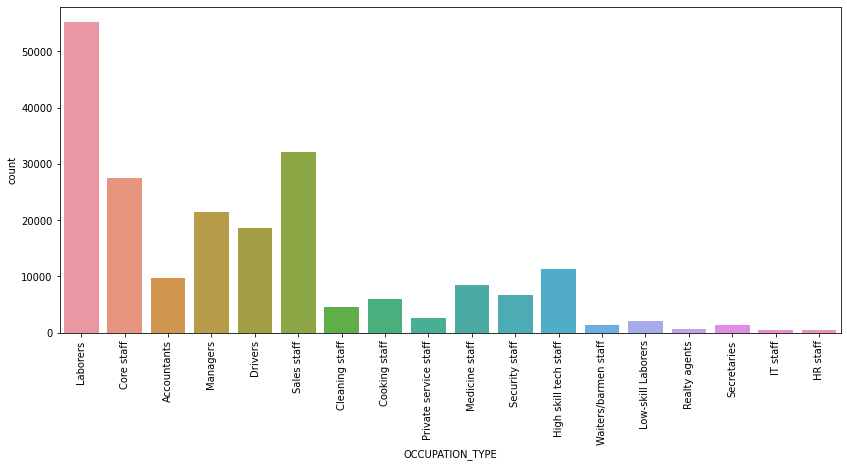

In [21]:
plt.figure(figsize=(14,6))
sns.countplot(data=Bank_AppData_DF,x='OCCUPATION_TYPE')
plt.xticks(rotation =90)
plt.show()

Comment: 
Out of all other Occupation Type, Labours are the highest loan applicants.
Our null percentage for Occupation Type is qutie high, so cant perform data imputation


##### 2. EXT_SOURCE_3 ---- 19.83% null values

In [22]:
# Check if EXT_SOURCE_3 categorical or numerical
EXT_SOURCE_3_Type ='Categorical' if 'EXT_SOURCE_3' in categorialTypeColumns else 'Numerical'
EXT_SOURCE_3_Type

'Numerical'

In [23]:
Bank_AppData_DF['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

<AxesSubplot:xlabel='EXT_SOURCE_3'>

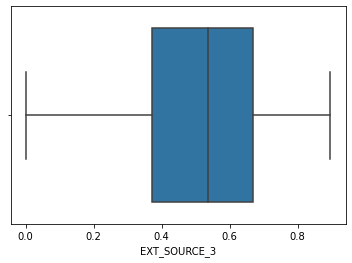

In [24]:
sns.boxplot(data=Bank_AppData_DF, x='EXT_SOURCE_3',orient='v')

- Comment: 

    * No outliers
    * Null percentage is also high, so we can avoid performing imputation for EXT_SOURCE_3.

##### 3. Columns With ---- 13.00% null values

- Columns
    * AMT_REQ_CREDIT_BUREAU_HOUR
    * AMT_REQ_CREDIT_BUREAU_DAY
    * AMT_REQ_CREDIT_BUREAU_WEEK
    * AMT_REQ_CREDIT_BUREAU_MON
    * AMT_REQ_CREDIT_BUREAU_QRT
    * AMT_REQ_CREDIT_BUREAU_YEAR

In [25]:
# Still null percentage is high for below columns, so we are not going to impute the data.
Bank_AppData_DF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [26]:
"""EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE
These columns are having null percentage between 0 and 1. So imputation of data is possible."""

nullInfoDfLessThanOnePercent= nullInfoDataFrame[(nullInfoDataFrame['Null %']>0) & (nullInfoDataFrame['Null %']<1)]
nullInfoDfLessThanOnePercent.sort_values(by='Null %', ascending=False)

,Columns,NullCount,Null %
11,NAME_TYPE_SUITE,1292,0.42
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33
92,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33
93,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33
94,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
42,EXT_SOURCE_2,660,0.21
10,AMT_GOODS_PRICE,278,0.09


In [27]:
# Checking the type of Variable ---- Numerical or Categorical. Accordingly visualizations can be used

col_Min_Null_Percentage= nullInfoDfLessThanOnePercent.sort_values(by='Null %', ascending=False)['Columns'].tolist()

for i in col_Min_Null_Percentage:
    if i in categorialTypeColumns:
        print(i,':','Categorical')
    else:
        print(i,':','Numerical')


NAME_TYPE_SUITE : Categorical
OBS_30_CNT_SOCIAL_CIRCLE : Numerical
DEF_30_CNT_SOCIAL_CIRCLE : Numerical
OBS_60_CNT_SOCIAL_CIRCLE : Numerical
DEF_60_CNT_SOCIAL_CIRCLE : Numerical
EXT_SOURCE_2 : Numerical
AMT_GOODS_PRICE : Numerical


#### 4. Analysis for NAME_TYPE_SUITE

In [28]:
# checking values of Name type suite
Bank_AppData_DF['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

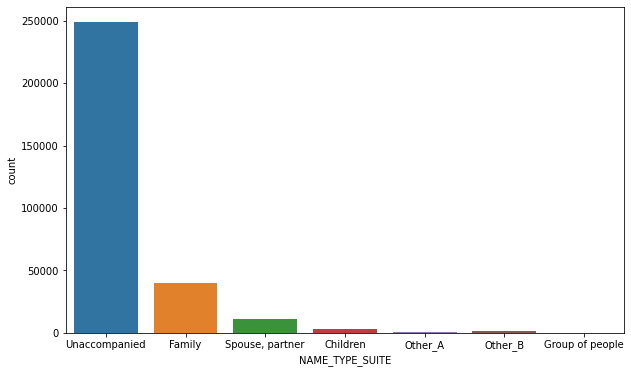

In [29]:
#Visualizing the above value count using count plot.
plt.figure(figsize=(10,6))
sns.countplot(Bank_AppData_DF['NAME_TYPE_SUITE'])
plt.show()

**From above count plot:**
1. Unaccompanied are the max number of people who can act as a guaranteer for loan application.
2. Family, Spouse,Partner and Children are the least favourable choices as an guaranteer.


#### 5. Analysis for OBS_30_CNT_SOCIAL_CIRCLE

In [30]:
Bank_AppData_DF['OBS_30_CNT_SOCIAL_CIRCLE'].describe()
# here we can see that the min is 0.0 and max 75% is 2.0 but max is 348. So we need to check for outliers using the box plot


count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

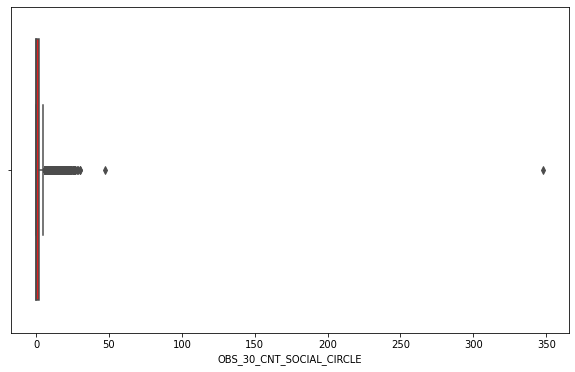

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(Bank_AppData_DF['OBS_30_CNT_SOCIAL_CIRCLE'],color='red')
plt.show()

In [32]:
print('OBS_30_CNT_SOCIAL_CIRCLE -- Mean :', Bank_AppData_DF['OBS_30_CNT_SOCIAL_CIRCLE'].mean())
print('OBS_30_CNT_SOCIAL_CIRCLE -- Mode :',Bank_AppData_DF['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])


OBS_30_CNT_SOCIAL_CIRCLE -- Mean : 1.4222454239942575
OBS_30_CNT_SOCIAL_CIRCLE -- Mode : 0.0


- Comments
    * OBS_30_CNT_SOCIAL_CIRCLE box plot is showing 2 outlier. 
    * one is at 50 and other one at 350.
    * This column has null percentage 0.33%. 
    * We can perform imputation on this column. 
    * We can use either mean or mode for the same.


#### 6. Analysis for DEF_30_CNT_SOCIAL_CIRCLE

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64 

Mode : 0.0 



<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE'>

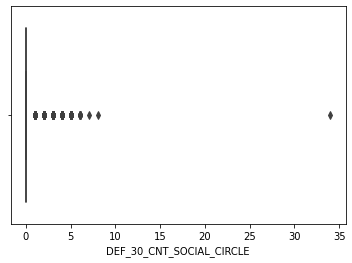

In [33]:
# identify if there are any outliers using boxplot
print(Bank_AppData_DF['DEF_30_CNT_SOCIAL_CIRCLE'].describe(),'\n')
print('Mode :',Bank_AppData_DF['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0],'\n')
sns.boxplot(Bank_AppData_DF['DEF_30_CNT_SOCIAL_CIRCLE']) 


- Comments:
    * mean 0.143421
    * mode 0.0
    * Null percentage is between 0 and 1, we can consider this column for imputation. 

#### 7. Analysis for OBS_60_CNT_SOCIAL_CIRCLE

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
26.0          1
27.0          5
28.0          1
29.0          2
30.0          1
47.0          1
344.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

Description:
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

Mode :  0.0



<AxesSubplot:xlabel='OBS_60_CNT_SOCIAL_CIRCLE'>

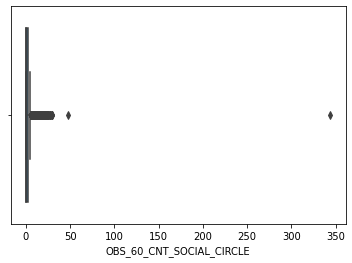

In [34]:
# check values
print(Bank_AppData_DF['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index())
print()
# describe
print('Description:')
print(Bank_AppData_DF['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

print('\nMode : ',Bank_AppData_DF['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])

print()
sns.boxplot(Bank_AppData_DF['OBS_60_CNT_SOCIAL_CIRCLE'])

- Comments
    * There are outliers at 50 and 350
    * mean 1.405292
    * Mode :  0.0
    * Null percentage is between 0 and 1, we can consider this column for imputation.

#### 8. Analysis for DEF_60_CNT_SOCIAL_CIRCLE

VALUE COUNTS:
0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

DESCRIPTION:
count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

MODE: 0.0


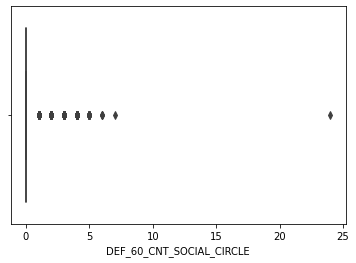

In [35]:
#getting details of values
print('VALUE COUNTS:')
print(Bank_AppData_DF['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index())

print('\nDESCRIPTION:')
print(Bank_AppData_DF['DEF_60_CNT_SOCIAL_CIRCLE'].describe())

# retrieve mode
print('\nMODE:',Bank_AppData_DF['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

#plotting box plot
sns.boxplot(Bank_AppData_DF['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

- Comments:
    * outliers are at 7.5 and 24
    * mean is 0.100049 and mode is 0.0
    * Null percentage is between 0 and 1, we can consider this column for imputation.

#### 9. Analysis for EXT_SOURCE_2

VALUE COUNTS:
8.173617e-08     1
1.315956e-06     1
5.002109e-06     1
5.600338e-06     1
5.939651e-06     1
                ..
8.206095e-01     1
8.206159e-01     1
8.213936e-01     1
8.217142e-01     1
8.549997e-01    26
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

DESCRIPTION:
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

MEDIAN: 0.5659614260608526

MODE: 0.2858978721410488


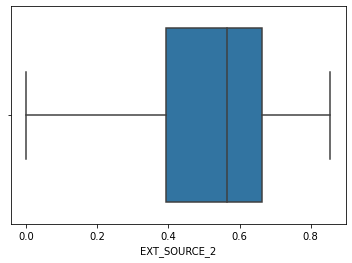

In [36]:
print('VALUE COUNTS:')
print(Bank_AppData_DF['EXT_SOURCE_2'].value_counts().sort_index())



print('\nDESCRIPTION:')
print(Bank_AppData_DF['EXT_SOURCE_2'].describe())

# retrieve median
print('\nMEDIAN:',Bank_AppData_DF['EXT_SOURCE_2'].median())

# retrieve mode
print('\nMODE:',Bank_AppData_DF['EXT_SOURCE_2'].mode()[0])

#plotting box plot
sns.boxplot(Bank_AppData_DF['EXT_SOURCE_2'])
plt.show()

- Comments:
    * No Outliers
    * mean : 5.143927e-01, mode : 0.2858978721410488, median : 0.5659614260608526
    * Null percentage is between 0 and 1, we can consider this column for imputation.

#### 10. Analysis for AMT_GOODS_PRICE

VALUE COUNTS:
40500.0         1
45000.0      1169
49500.0       157
50751.0         1
54000.0       290
             ... 
3555000.0       1
3600000.0       3
3712500.0       1
3825000.0       1
4050000.0       8
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

DESCRIPTION:
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

MEDIAN: 450000.0

MODE: 450000.0


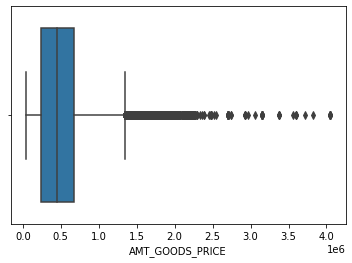

In [37]:
print('VALUE COUNTS:')
print(Bank_AppData_DF['AMT_GOODS_PRICE'].value_counts().sort_index())

print('\nDESCRIPTION:')
print(Bank_AppData_DF['AMT_GOODS_PRICE'].describe())

# retrieve median
print('\nMEDIAN:',Bank_AppData_DF['AMT_GOODS_PRICE'].median())

# retrieve mode
print('\nMODE:',Bank_AppData_DF['AMT_GOODS_PRICE'].mode()[0])

#plotting box plot
sns.boxplot(Bank_AppData_DF['AMT_GOODS_PRICE'])
plt.show()

- Comments:
    * AMT_GOODS_PRICE---->(Product Price)For consumer loans it is the price of the goods for which the loan  is given. So if we have outlier then it could be valid value of this column.
    * mean : 5.383962e+05, mode=450000.0, median=450000.0

In [38]:
# check columns for data issue

for column in Bank_AppData_DF.columns.tolist():
    print(column,':',Bank_AppData_DF[column].unique())

SK_ID_CURR : [100002 100003 100004 ... 456253 456254 456255]
TARGET : [1 0]
NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
CODE_GENDER : ['M' 'F' 'XNA']
FLAG_OWN_CAR : ['N' 'Y']
FLAG_OWN_REALTY : ['Y' 'N']
CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE : [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : ['Singl

### Analysing Issues With Data

1. CODE_GENDER : ['M' 'F' 'XNA']

In [39]:
# replacing the XNA with the most common value in CODE_GENDER
Bank_AppData_DF['CODE_GENDER'].replace('XNA',Bank_AppData_DF['CODE_GENDER'].mode()[0],inplace=True)

In [40]:
Bank_AppData_DF['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

2. DAYS_BIRTH : [ -9461 -16765 -19046...... ]

In [41]:
Bank_AppData_DF['YEARS_BIRTH']=Bank_AppData_DF['DAYS_BIRTH'].apply(lambda x: round(abs(x)/365))

In [42]:
Bank_AppData_DF['YEARS_BIRTH']

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: YEARS_BIRTH, Length: 307511, dtype: int64

3. NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated' 'Unknown']

In [43]:
Bank_AppData_DF['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

In [44]:
# replacing Unknown with the most common value i.e Married
Bank_AppData_DF['NAME_FAMILY_STATUS'].replace('Unknown',Bank_AppData_DF['NAME_FAMILY_STATUS'].mode()[0],inplace=True)

In [45]:
Bank_AppData_DF['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

- Comments:
    * Maaried category seems to be a good fit for imputation.

4. DAYS_EMPLOYED
    - indicates How many days before the application the person started current employment     
    - DAYS_EMPLOYED : [  -637  -1188   -225 ... -12971 -11084  -8694]


In [46]:
Bank_AppData_DF['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [47]:

Bank_AppData_DF['DAYS_EMPLOYED']=Bank_AppData_DF['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x<0 else x)

In [48]:
Bank_AppData_DF['DAYS_EMPLOYED'].value_counts().head()

365243    55374
200         156
224         152
230         151
199         151
Name: DAYS_EMPLOYED, dtype: int64

- comments:
    * there are around 55 thousand people who are working from a long time.

In [49]:
Bank_AppData_DF[Bank_AppData_DF['DAYS_EMPLOYED']==365243]['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'Unemployed'], dtype=object)

In [50]:
# Analysing years of working/experience will be easy as compare to days
Bank_AppData_DF['YEARS_EMPLOYED']= Bank_AppData_DF['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

In [51]:
Bank_AppData_DF['YEARS_EMPLOYED'].head()

0    2
1    3
2    1
3    8
4    8
Name: YEARS_EMPLOYED, dtype: int64

5. DAYS_REGISTRATION
    - How many days before the application did client change his registration
    - DAYS_REGISTRATION: [ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]

In [52]:
Bank_AppData_DF['DAYS_REGISTRATION'].value_counts().sort_index(ascending=False)

 0.0         80
-1.0        113
-2.0         92
-3.0         84
-4.0         92
           ... 
-22858.0      1
-22928.0      1
-23416.0      1
-23738.0      1
-24672.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [53]:
Bank_AppData_DF['DAYS_REGISTRATION']=Bank_AppData_DF['DAYS_REGISTRATION'].apply(lambda x: abs(x) if x<0 else x)

In [54]:
Bank_AppData_DF['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

<AxesSubplot:xlabel='DAYS_REGISTRATION'>

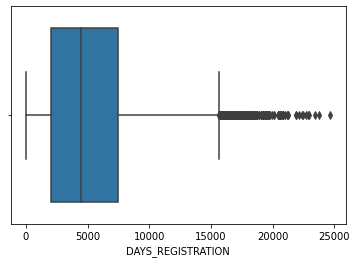

In [55]:
sns.boxplot(Bank_AppData_DF['DAYS_REGISTRATION'])

In [56]:
Bank_AppData_DF['YEARS_REGISTRATION']=Bank_AppData_DF['DAYS_REGISTRATION'].apply(lambda x: round(x/365) )

In [57]:
Bank_AppData_DF['YEARS_REGISTRATION']

0         10
1          3
2         12
3         27
4         12
          ..
307506    23
307507    12
307508    18
307509     7
307510    14
Name: YEARS_REGISTRATION, Length: 307511, dtype: int64

6. DAYS_ID_PUBLISH
    - How many days before the application did client change the identity document with which he applied for the loan
    - DAYS_ID_PUBLISH : [-2120  -291 -2531 ... -6194 -5854 -6211]

In [58]:
Bank_AppData_DF['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211], dtype=int64)

In [59]:
Bank_AppData_DF['DAYS_ID_PUBLISH']=Bank_AppData_DF['DAYS_ID_PUBLISH'].apply(lambda x: abs(x) if x<0 else x)

In [60]:
Bank_AppData_DF['YEARS_ID_PUBLISH']=Bank_AppData_DF['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

7. DAYS_LAST_PHONE_CHANGE
    - DAYS_LAST_PHONE_CHANGE : [-1134.  -828.  -815. ... -3988. -3899. -3538.]
    - How many days before application did client change phone

In [61]:
Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [62]:
Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE']=Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: abs(x) if x<0 else x)

In [63]:
Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].dtype

dtype('float64')

In [64]:
Bank_AppData_DF['YEARS_LAST_PHONE_CHANGE']=Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].apply(lambda x:x if np.isnan(x) else round(x/365),0)

In [65]:
Bank_AppData_DF['YEARS_LAST_PHONE_CHANGE'].unique()

array([3, 2, 7, 4, 0, 5, 6, 1, 8, 9, 11, 10, nan, 12], dtype=object)

## Helper Functions

##### we are calculating the IQR to find the outliers in multiple places. So instead of writing the same code multiple times, I am creating a function for the same.

1. Calcualte IQR

In [66]:

def calcIQR(IQR_func_df,colName):
    
    Q1= IQR_func_df[colName].quantile(0.25)
    Q3= IQR_func_df[colName].quantile(0.75)
    
    IQR= Q3-Q1
    outliers={}
    outliers['MinOutlierThreshold']=Q1- 1.5*IQR
    outliers['MaxOutlierThreshold']=Q3+1.5*IQR
    
    return outliers
     

2. AgeCategorization

In [67]:
def ageCategorization(years):
    result=None
    if years<20:
        result='0-20'
    elif years>20 and years<=30:
        result='20-30'
    elif years>30 and years<=40:
        result='30-40'
    elif years>40 and years<=50:
        result='40-50'
    elif years>50 and years<=60:
        result='50-60'
    elif years>60 and years<=70:
        result='60-70'
    elif years>70:
        result='70+'
    return result   

3. Get Categorical Columns

In [68]:
def getCategorialColNames():
    set1=set(Bank_AppData_DF.columns)
    set2=set(Bank_AppData_DF.describe().columns)
    catdata=set1-set2 
    print(catdata)

4. Get Pie Comparison

In [69]:
def getPie(Target_Val_1_DF,Target_Val_0_DF,column):
    plt.style.use('dark_background')
    plt.figure(figsize = [20,12])

    plt.subplot(1,2,1)
    pltname = column + ' of clients with payment difficulties'
    plt.title(pltname)
    Target_Val_1_DF[column].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, colors = ['green','grey','purple','orange','red'], labeldistance=None)
    plt.legend()
    
    plt.subplot(1,2,2)
    pltname = column + ' of clients with on-time payments'
    plt.title(pltname)
    Target_Val_0_DF[column].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, colors = ['green','grey','purple','orange','red'], labeldistance=None)
    
    plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

## Working with Numerical Data

In [70]:
numericalTypeColumns= Bank_AppData_DF.select_dtypes(include=np.number).columns.tolist()
numericalTypeColumns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

1. CNT_CHILDREN
    - CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
    - Number of children the client has

In [71]:
Bank_AppData_DF['CNT_CHILDREN'].value_counts(normalize=True).sort_index()*100

0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
8      0.000650
9      0.000650
10     0.000650
11     0.000325
12     0.000650
14     0.000976
19     0.000650
Name: CNT_CHILDREN, dtype: float64

{'MinOutlierThreshold': -1.5, 'MaxOutlierThreshold': 2.5} 
 values before MinOutlierThreshold and after MaxOutlierThreshold are outliers


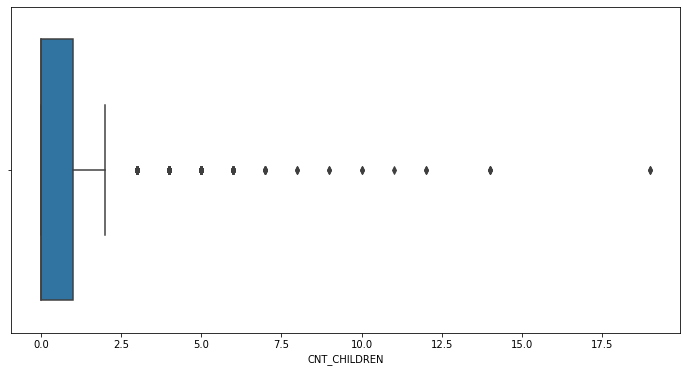

In [72]:

print(calcIQR(Bank_AppData_DF,'CNT_CHILDREN'),'\n','values before MinOutlierThreshold and after MaxOutlierThreshold are outliers')

plt.figure(figsize=(12,6))
sns.boxplot(Bank_AppData_DF['CNT_CHILDREN'])
plt.show()


- Comments:
    * applicants who are having 3 or more children are outliers here

2. AMT_INCOME_TOTAL
    - AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
    - Income of the client

In [73]:
temp=Bank_AppData_DF['AMT_INCOME_TOTAL'].value_counts(normalize=True)*100
Bank_AppData_DF['AMT_INCOME_TOTAL'].describe(percentiles=[0.75,0.99,0.999])
# print(calcIQR(Bank_AppData_DF,'AMT_INCOME_TOTAL'))


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
50%      1.471500e+05
75%      2.025000e+05
99%      4.725000e+05
99.9%    9.000000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

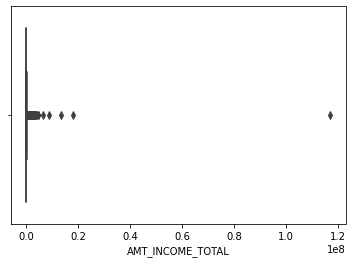

In [74]:
sns.boxplot(Bank_AppData_DF['AMT_INCOME_TOTAL'])

not able to identify anyhing from above chart. Need to consider the values with respect to the 99.9 percentile. i.e 90k

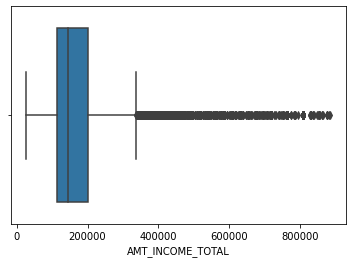

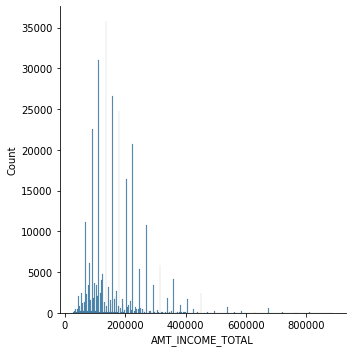

In [75]:
sns.boxplot(Bank_AppData_DF.AMT_INCOME_TOTAL[Bank_AppData_DF['AMT_INCOME_TOTAL']<900000])
sns.displot(Bank_AppData_DF.AMT_INCOME_TOTAL[Bank_AppData_DF['AMT_INCOME_TOTAL']<900000])

- comments:
    * people who are having income/salaries more than 90k are outliers
    

3. CNT_FAM_MEMBERS
    - CNT_FAM_MEMBERS : [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14. 12. 20. 15. 16. 11.]
    - How many family members does client have


In [76]:
Bank_AppData_DF['CNT_FAM_MEMBERS'].describe(percentiles=[0.75,0.99,0.999])
# Bank_AppData_DF['CNT_FAM_MEMBERS'].unique()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
50%           2.000000
75%           3.000000
99%           5.000000
99.9%         6.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

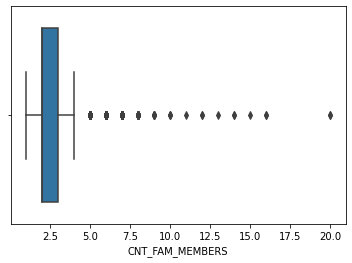

In [77]:
sns.boxplot(Bank_AppData_DF['CNT_FAM_MEMBERS'])

- comments:
    * we can see that people who are having 5 or more family members are outliers

4. AMT_ANNUITY
    - AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
    - Loan annuity (EMI Ammount)

In [78]:
Bank_AppData_DF['AMT_ANNUITY'].describe(percentiles=[0.75,0.99,0.999])

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
50%       24903.000000
75%       34596.000000
99%       70006.500000
99.9%    110047.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

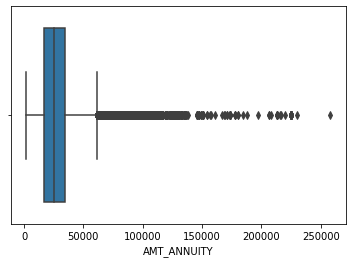

In [79]:
sns.boxplot(Bank_AppData_DF['AMT_ANNUITY'])

from above boxplot, i am not able to understand the outliers. To get more insight, i am calling the prefdefine helper function which will give me the details for outliers

In [80]:
print(calcIQR(Bank_AppData_DF,'AMT_ANNUITY'))

{'MinOutlierThreshold': -10584.0, 'MaxOutlierThreshold': 61704.0}


- Comments:
    * the values before -10584.0 and after 61704.0 are outliers

5. AMT_CREDIT
    - AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
    - Credit amount of the loan

In [81]:
Bank_AppData_DF['AMT_CREDIT'].describe(percentiles=[0.75,0.99,0.999])

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
50%      5.135310e+05
75%      8.086500e+05
99%      1.854000e+06
99.9%    2.517300e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='AMT_CREDIT'>

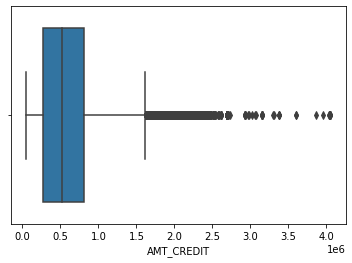

In [82]:
sns.boxplot(Bank_AppData_DF['AMT_CREDIT'])

In [83]:
calcIQR(Bank_AppData_DF,'AMT_CREDIT')

{'MinOutlierThreshold': -537975.0, 'MaxOutlierThreshold': 1616625.0}

- Comments:
    * the values before -537975.0 and after 1616625.0 are outliers

6. DAYS_LAST_PHONE_CHANGE
    - DAYS_LAST_PHONE_CHANGE : [-1134.  -828.  -815. ... -3988. -3899. -3538.]
    - How many days before application did client change phone

In [84]:
Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].describe(percentiles=[0.75,0.99,0.999])
Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].unique()

array([1134.,  828.,  815., ..., 3988., 3899., 3538.])

<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE'>

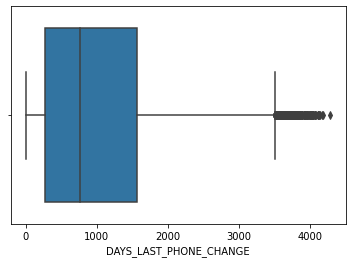

In [85]:
sns.boxplot(Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'])

In [86]:
calcIQR(Bank_AppData_DF,'DAYS_LAST_PHONE_CHANGE') 

{'MinOutlierThreshold': -1670.0, 'MaxOutlierThreshold': 3514.0}

- Comments:
    * the values before -1670.0 and after 3514.0 are outliers

In [87]:
getCategorialColNames()

{'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE', 'YEARS_LAST_PHONE_CHANGE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'FLAG_OWN_CAR', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'}


## Working With Continuous Columns

1. AMT_GOODS_PRICE
    - AMT_GOODS_PRICE : [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
    - (Product Price) For consumer loans it is the price of the goods for which the loan is given

In [88]:
Bank_AppData_DF['AMT_GOODS_PRICE'].value_counts(normalize=True)


450000.0     0.084698
225000.0     0.082289
675000.0     0.081248
900000.0     0.050177
270000.0     0.037197
               ...   
1265751.0    0.000003
503266.5     0.000003
810778.5     0.000003
666090.0     0.000003
743863.5     0.000003
Name: AMT_GOODS_PRICE, Length: 1002, dtype: float64

In [89]:
Bank_AppData_DF['AMT_GOODS_PRICE_CATEGORY']=pd.cut(Bank_AppData_DF['AMT_GOODS_PRICE'],bins=5,labels=['very low','low','medium','high','very high'])

In [90]:
Bank_AppData_DF['AMT_GOODS_PRICE_CATEGORY'].value_counts()

very low     246973
low           56087
medium         4108
high             47
very high        18
Name: AMT_GOODS_PRICE_CATEGORY, dtype: int64

2. YEARS_BIRTH
    - took from YEARS_BIRTH

In [91]:
Bank_AppData_DF['YEARS_BIRTH_CATEGORY']=Bank_AppData_DF['YEARS_BIRTH'].apply(ageCategorization)

In [92]:
Bank_AppData_DF['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending=False)

30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: YEARS_BIRTH_CATEGORY, dtype: int64

3. YEARS_REGISTRATION
    - took from DAYS_REGISTRATION

In [93]:
Bank_AppData_DF['YEARS_REGISTRATION'].value_counts().sort_values(ascending=False).head()

1     15661
2     15564
3     13894
13    12866
12    12697
Name: YEARS_REGISTRATION, dtype: int64

In [94]:
(Bank_AppData_DF['YEARS_REGISTRATION'].value_counts(normalize=True).sort_values(ascending=False)*100).head()

1     5.092826
2     5.061282
3     4.518212
13    4.183915
12    4.128958
Name: YEARS_REGISTRATION, dtype: float64

In [95]:
Bank_AppData_DF['YEARS_REGISTRATION'].describe(percentiles=[0.25,0.75,0.99,0.9999,])

count     307511.000000
mean          13.659440
std            9.659369
min            0.000000
25%            6.000000
50%           12.000000
75%           20.000000
99%           38.000000
99.99%        54.249000
max           68.000000
Name: YEARS_REGISTRATION, dtype: float64

In [96]:
Bank_AppData_DF['YEARS_REGISTRATION_CATEGORY']=Bank_AppData_DF['YEARS_REGISTRATION'].apply(ageCategorization)

In [97]:
Bank_AppData_DF['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending=False)

0-20     222761
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: YEARS_REGISTRATION_CATEGORY, dtype: int64

we have dealth with the numerical and categorical columns as of now with respect to null values and binning whenever required.

### Dealing with TARGET

In [98]:
(Bank_AppData_DF['TARGET'].value_counts(normalize=True)*100)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

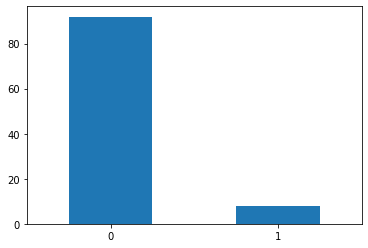

In [99]:
(Bank_AppData_DF['TARGET'].value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=0)
plt.show()

- Comments:
    * 1 indicates the people with payment issues
    * 0 indicates other cases

    - We will segregate the data on the basis of TARGET

In [100]:
Target_Val_1_DF= Bank_AppData_DF[Bank_AppData_DF['TARGET']==1]

In [101]:
Target_Val_0_DF= Bank_AppData_DF[Bank_AppData_DF['TARGET']==0]

### Categorical Columns --- Univariate Analysis

In [102]:
getCategorialColNames()

{'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE', 'YEARS_LAST_PHONE_CHANGE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'FLAG_OWN_CAR', 'AMT_GOODS_PRICE_CATEGORY', 'NAME_HOUSING_TYPE', 'YEARS_BIRTH_CATEGORY', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'YEARS_REGISTRATION_CATEGORY'}


1. NAME_CONTRACT_TYPE

In [103]:
Target_Val_1_DF['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending=False)

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:>

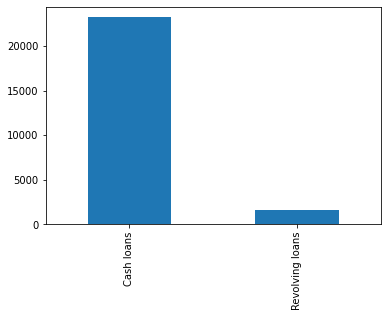

In [104]:
Target_Val_1_DF['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending=False).plot.bar()


<AxesSubplot:>

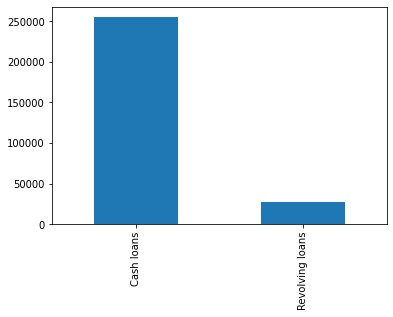

In [105]:
Target_Val_0_DF['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending=False).plot.bar()

- Comment:
    - if we compare the above two box plots with respect to target=1 and target=0, then there is not a noticeable difference in the revolving loans and cash loans. Basically the people with payment issues and and other ones which are not having any payment issues are having same representaitons for the cash loan and revolving loan
    - NAME_CONTRACT_TYPE cant be a deciding factor here.

2. CODE_GENDER

<AxesSubplot:>

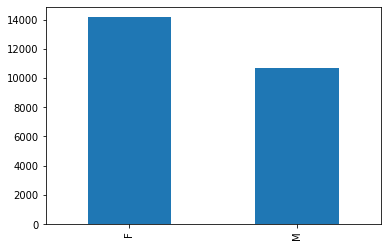

In [106]:
Target_Val_1_DF['CODE_GENDER'].value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

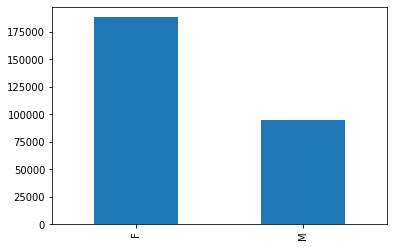

In [107]:
Target_Val_0_DF['CODE_GENDER'].value_counts().sort_values(ascending=False).plot.bar()

- Comments:
    * from above two boxplots we cant say that there is any strong correlation which will indicate gender based payment difficulty

3. FLAG OWN CAR

<AxesSubplot:>

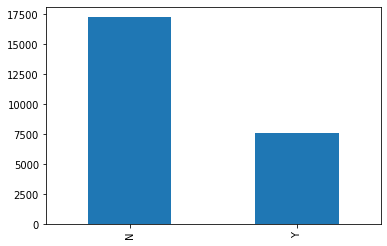

In [108]:
Target_Val_1_DF['FLAG_OWN_CAR'].value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

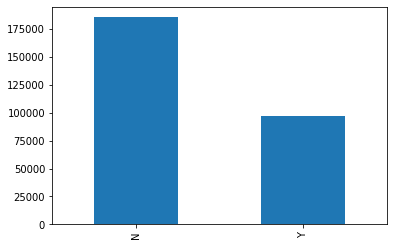

In [109]:
Target_Val_0_DF['FLAG_OWN_CAR'].value_counts().sort_values(ascending=False).plot.bar()


- Comments:
    * FLAG OWN CAR is not a strong indicator for payment delay or on time payments

4. NAME_INCOME_TYPE


<AxesSubplot:>

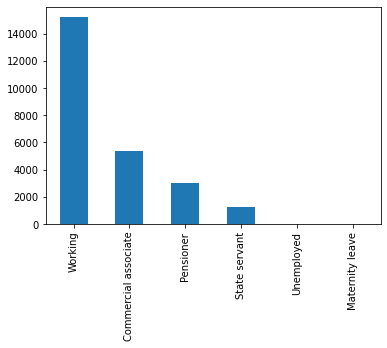

In [110]:
Target_Val_1_DF['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

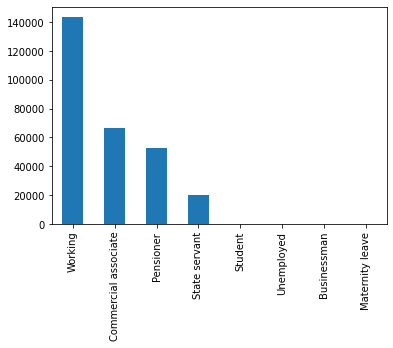

In [111]:
Target_Val_0_DF['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).plot.bar()

- Comments:
    - from above two box plots we can see that:
        * students and businessmen dont have any difficulty in payments.
        * pensioners seem to have good on time payment frequency. Still this cant be deciding factor 
    

5. NAME_EDUCATION_TYPE

<AxesSubplot:>

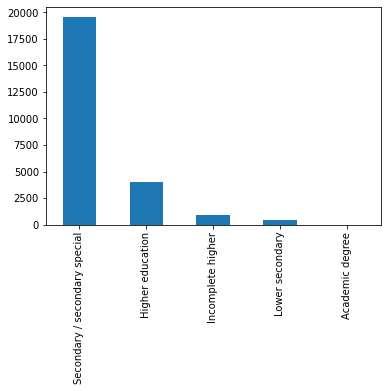

In [112]:
Target_Val_1_DF['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

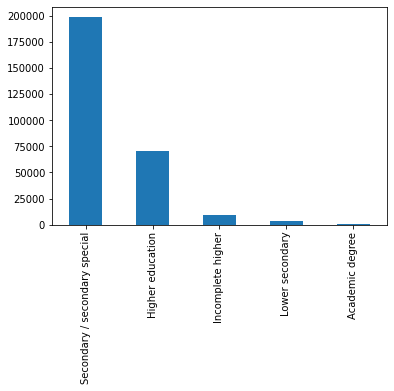

In [113]:
Target_Val_0_DF['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar()

- Comments:
    * From above two boxplots we can see that the people who are having Higher Education not having much payment difficulties. Still, correlation is not that strong to indicate any robust result.

6. NAME_FAMILY_STATUS

In [114]:
# Target_Val_1_DF['NAME_FAMILY_STATUS'].value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

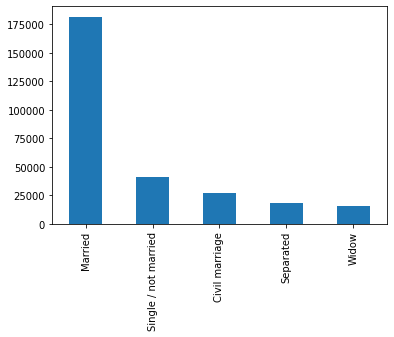

In [115]:
Target_Val_0_DF['NAME_FAMILY_STATUS'].value_counts().sort_values(ascending=False).plot.bar()

its difficult to identify the differences from above two boxplots. Pie chart can be used here to do the neeful

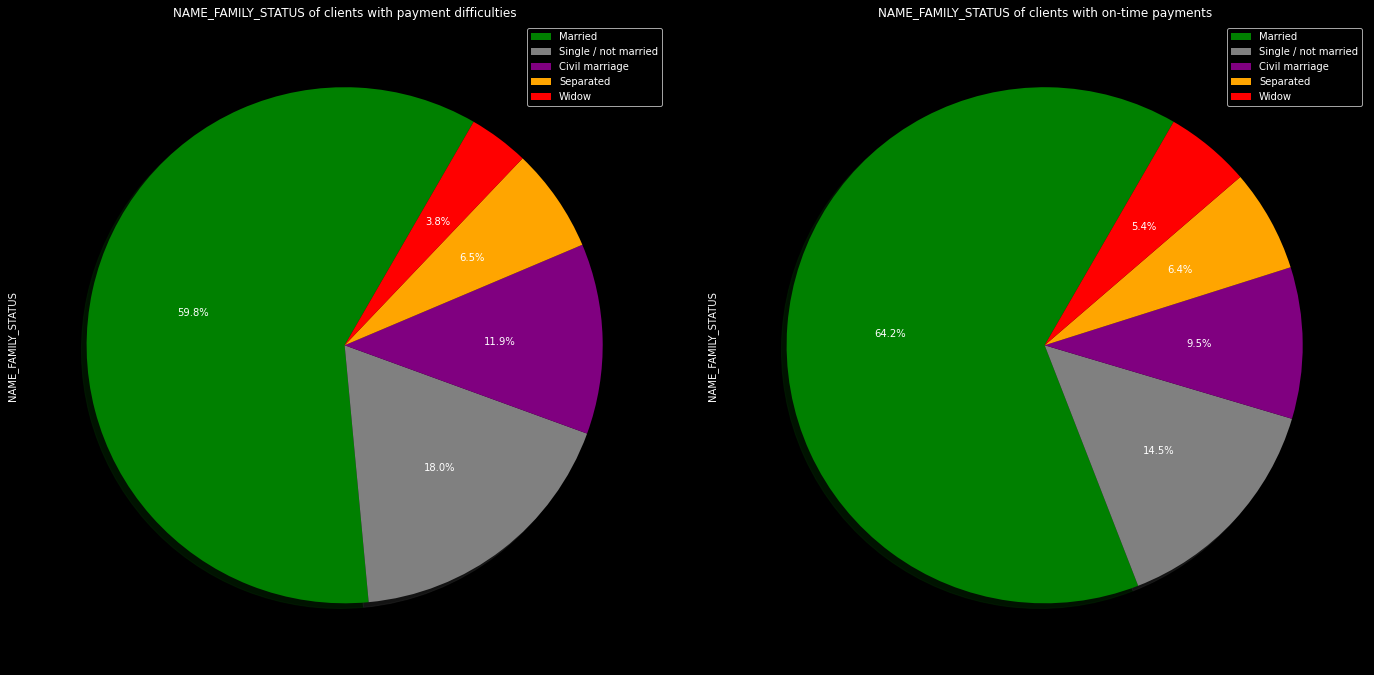

In [116]:
getPie(Target_Val_1_DF,Target_Val_0_DF,'NAME_FAMILY_STATUS')

- Comments:
    * Married Men--- 58% represent payment difficulties while 64% representing the on time payment
    * Widow ---3.8% represent payment difficulties while 5.4% representing the on time payment
    * Single/Not Married ---18% represent payment difficulties while 14.5% representing the on time payment

    correlation for above params are not that strong to indicate any robust outcome

## Correlation

1. Correlation for Payment Difficulties

In [117]:
Corr_target_val_1_DF=Target_Val_1_DF.select_dtypes(include=[np.number]).corr()

In [118]:
Corr_target_val_1_DF.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,-0.001254,-0.005161,...,-0.012036,-0.007954,-0.002999,0.006436,-0.000880,0.008916,0.001299,-0.005166,-0.006408,0.002450
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,0.259109,-0.192864,...,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427,-0.258910,-0.192862,-0.149369,0.032679
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,0.003096,-0.014977,...,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752,-0.002872,-0.014967,0.000144,0.004242
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,-0.135316,0.001930,...,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719,0.135318,0.001933,0.025925,0.052461


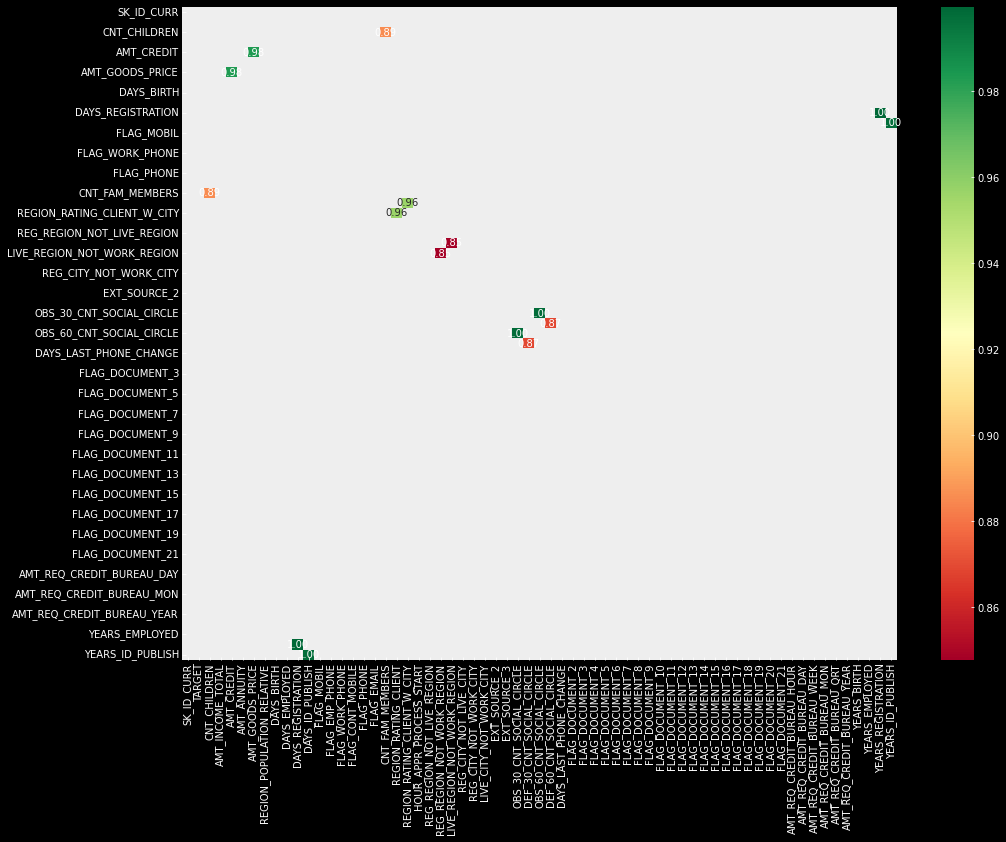

In [119]:

plt.style.use('bmh')
plt.figure(figsize=[16,12])
sns.heatmap(data= Corr_target_val_1_DF[(Corr_target_val_1_DF>0.8)&(Corr_target_val_1_DF<0.9999)],annot=True,cmap='RdYlGn',cbar=True,fmt='.2f')
plt.show()

In [120]:
Corr_target_val_1_DF[Corr_target_val_1_DF<0.99].unstack().sort_values(ascending=False)


AMT_CREDIT                   AMT_GOODS_PRICE                0.983103
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
                                                              ...   
YEARS_ID_PUBLISH             FLAG_MOBIL                          NaN
                             FLAG_DOCUMENT_4                     NaN
                             FLAG_DOCUMENT_10                    NaN
                             FLAG_DOCUMENT_12                    NaN
                             YEARS_ID_PUBLISH                    NaN
Length: 4225, dtype: float64

- Comments: After removing duplicate combinations from above heatmap correlation

    * AMT_GOODS_PRICE AMT_CREDIT 0.98
    * REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY 0.96
    * CNT_FAM_MEMBERS CNT_CHILDREN 0.89
    * DEF_60_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE 0.87
    * REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION 0.85
    * LIVE_CITY_NOT_WORK_CITY REG_CITY_NOT_WORK_CITY 0.78
    * AMT_ANNUITY AMT_GOODS_PRICE 0.75
    * AMT_ANNUITY AMT_CREDIT 0.75
    * DAYS_EMPLOYED FLAG_DOCUMENT_6 0.62
    * DAYS_BIRTH DAYS_EMPLOYED 0.58

2. Correlation for ontime Payments

In [121]:
Corr_target_val_0_DF=Target_Val_1_DF.select_dtypes(include=[np.number]).corr()

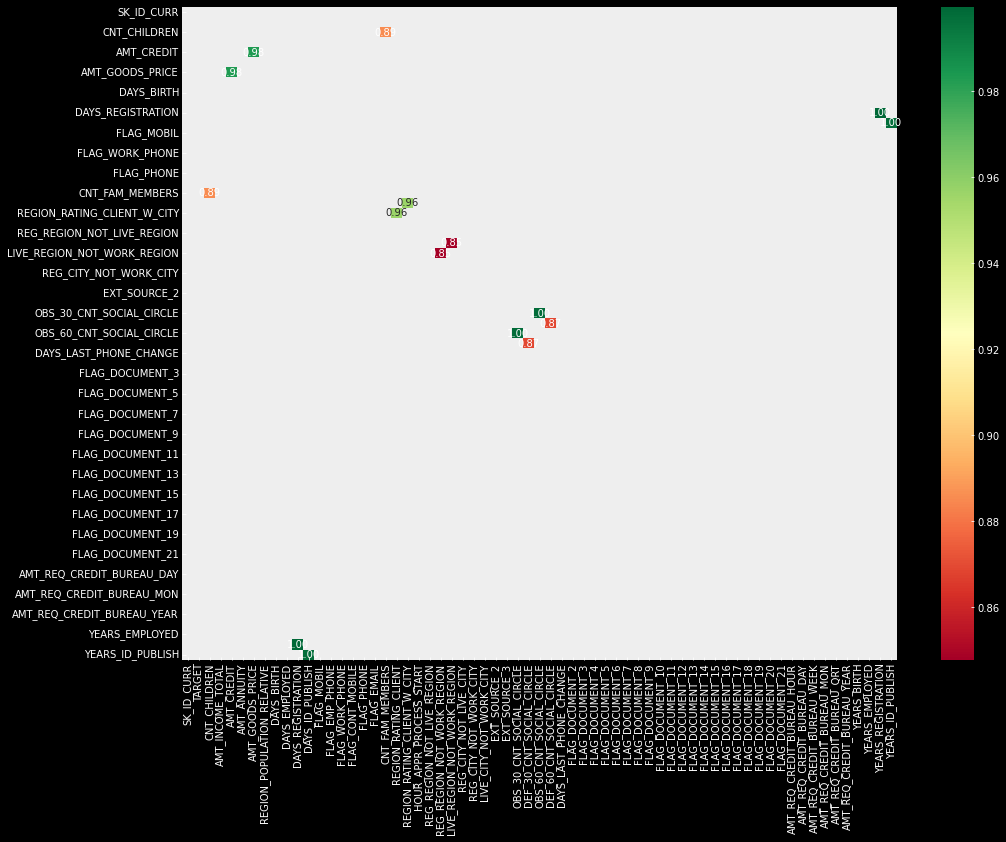

In [122]:
plt.style.use('bmh')
plt.figure(figsize=[16,12])
sns.heatmap(data= Corr_target_val_0_DF[(Corr_target_val_1_DF>0.8)&(Corr_target_val_1_DF<0.9999)],annot=True,cmap='RdYlGn',cbar=True,fmt='.2f')
plt.show()

- Comments: After removing duplicates from above heatmap correlations

    * AMT_GOODS_PRICE AMT_CREDIT 0.99
    * REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY 0.95
    * CNT_FAM_MEMBERS CNT_CHILDREN 0.88
    * REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION 0.86
    * DEF_30_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE 0.86
    * LIVE_CITY_NOT_WORK_CITY REG_CITY_NOT_WORK_CITY 0.83
    * AMT_ANNUITY AMT_GOODS_PRICE 0.78
    * AMT_ANNUITY AMT_CREDIT 0.77
    * DAYS_BIRTH DAYS_EMPLOYED 0.63
    * DAYS_EMPLOYED FLAG_DOCUMENT_6 0.60

- Comments:
    * Highest Correlation combination is for AMT_GOODS_PRICE and AMT_CREDIT
    * Correlation_Payment_Difficulty:  AMT_GOODS_PRICE and AMT_CREDIT =0.98
    * Correlation_On-Time_Payment   :  AMT_GOODS_PRICE and AMT_CREDIT =0.99

## Numerical Types --- Univariate Analysis

1. AMT_CREDIT : (for Defaulters and on time Payers)

In [123]:
Target_Val_1_DF['AMT_CREDIT'].value_counts().describe(percentiles=[0.75,0.99,0.999])

count    2504.000000
mean        9.914137
std        44.111663
min         1.000000
50%         2.000000
75%         6.000000
99%       152.910000
99.9%     632.287000
max      1058.000000
Name: AMT_CREDIT, dtype: float64

In [124]:
calcIQR(Target_Val_1_DF,'AMT_CREDIT')

{'MinOutlierThreshold': -388973.25, 'MaxOutlierThreshold': 1406688.75}

In [125]:
Target_Val_0_DF['AMT_CREDIT'].value_counts().describe(percentiles=[0.75,0.99,0.999])

count    5488.00000
mean       51.50984
std       311.42610
min         1.00000
50%         6.00000
75%        23.00000
99%       786.39000
99.9%    5044.16600
max      8651.00000
Name: AMT_CREDIT, dtype: float64

In [126]:
calcIQR(Target_Val_0_DF,'AMT_CREDIT')

{'MinOutlierThreshold': -540000.0, 'MaxOutlierThreshold': 1620000.0}

Removing outliers and plotting data

<Figure size 1440x1080 with 0 Axes>

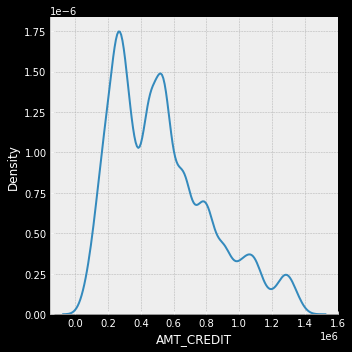

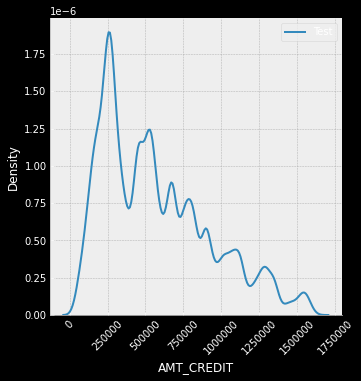

In [127]:
plt.figure(figsize=[20,15])
sns.displot(Target_Val_1_DF[Target_Val_1_DF['AMT_CREDIT']< calcIQR(Target_Val_1_DF,'AMT_CREDIT')['MaxOutlierThreshold']].AMT_CREDIT,label='Test', kind='kde') 
sns.displot(Target_Val_0_DF[Target_Val_0_DF['AMT_CREDIT']< calcIQR(Target_Val_0_DF,'AMT_CREDIT')['MaxOutlierThreshold']].AMT_CREDIT,label='Test', kind='kde') 
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain',axis='x')
plt.show()

- Comments:
    * if AMT_CREDIT:>75000 then people are on time payers
    * whereas if AMT_CREDIT is betwwen 25000 and 65000, then people are defaulters 

2. AMT_GOODS_PRICE

In [128]:
print(calcIQR(Target_Val_1_DF,'AMT_GOODS_PRICE'))
print(calcIQR(Target_Val_0_DF,'AMT_GOODS_PRICE'))


{'MinOutlierThreshold': -416250.0, 'MaxOutlierThreshold': 1329750.0}
{'MinOutlierThreshold': -436500.0, 'MaxOutlierThreshold': 1363500.0}


removing outliers and plotting data

<Figure size 1440x1080 with 0 Axes>

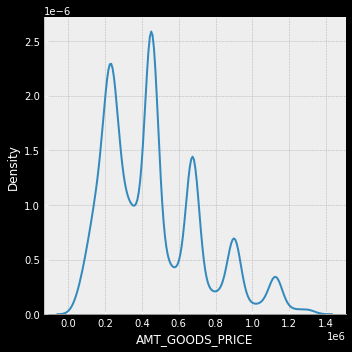

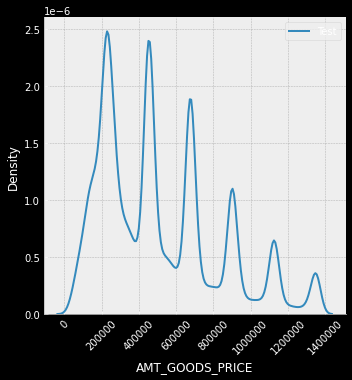

In [129]:
plt.figure(figsize=[20,15])
sns.displot(Target_Val_1_DF[Target_Val_1_DF['AMT_GOODS_PRICE']< calcIQR(Target_Val_1_DF,'AMT_GOODS_PRICE')['MaxOutlierThreshold']].AMT_GOODS_PRICE,label='Test', kind='kde') 
sns.displot(Target_Val_0_DF[Target_Val_0_DF['AMT_GOODS_PRICE']< calcIQR(Target_Val_0_DF,'AMT_GOODS_PRICE')['MaxOutlierThreshold']].AMT_GOODS_PRICE,label='Test', kind='kde') 
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain',axis='x')
plt.show()

- Comments:
    * AMT_GOOD_PRICE between 250000 and 550000 repesents the ones having difficulty in payment.

3. DAYS_EMPLOYED

In [130]:
print(calcIQR(Target_Val_1_DF,'DAYS_EMPLOYED'))
print(calcIQR(Target_Val_0_DF,'DAYS_EMPLOYED'))

{'MinOutlierThreshold': -3227.5, 'MaxOutlierThreshold': 7184.5}
{'MinOutlierThreshold': -6693.5, 'MaxOutlierThreshold': 13734.5}


<Figure size 1440x1080 with 0 Axes>

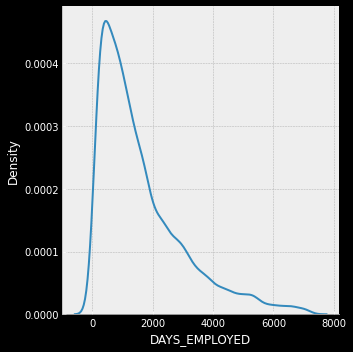

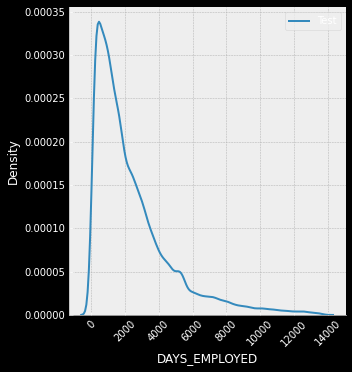

In [131]:
plt.figure(figsize=[20,15])
sns.displot(Target_Val_1_DF[Target_Val_1_DF['DAYS_EMPLOYED']< calcIQR(Target_Val_1_DF,'DAYS_EMPLOYED')['MaxOutlierThreshold']].DAYS_EMPLOYED,label='Test', kind='kde') 
sns.displot(Target_Val_0_DF[Target_Val_0_DF['DAYS_EMPLOYED']< calcIQR(Target_Val_0_DF,'DAYS_EMPLOYED')['MaxOutlierThreshold']].DAYS_EMPLOYED,label='Test', kind='kde') 
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain',axis='x')
plt.show()

- Comments:
    * DAYS_EMPLOYED < 2000 repsents here the defaulters
    * Whereas DAYS_EMPLOYED > 2000 represents the on time payment.

4. CNT_CHILDREN

In [132]:
print(calcIQR(Target_Val_1_DF,'CNT_CHILDREN'))
print(calcIQR(Target_Val_0_DF,'CNT_CHILDREN'))

{'MinOutlierThreshold': -1.5, 'MaxOutlierThreshold': 2.5}
{'MinOutlierThreshold': -1.5, 'MaxOutlierThreshold': 2.5}


<Figure size 1440x1080 with 0 Axes>

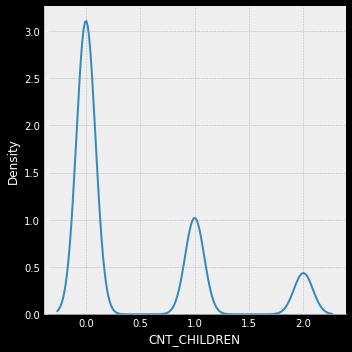

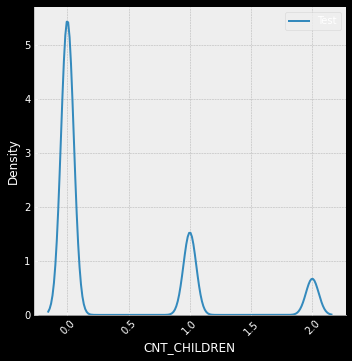

In [133]:
plt.figure(figsize=[20,15])
sns.displot(Target_Val_1_DF[Target_Val_1_DF['CNT_CHILDREN']< calcIQR(Target_Val_1_DF,'CNT_CHILDREN')['MaxOutlierThreshold']].CNT_CHILDREN,label='Test', kind='kde') 
sns.displot(Target_Val_0_DF[Target_Val_0_DF['CNT_CHILDREN']< calcIQR(Target_Val_0_DF,'CNT_CHILDREN')['MaxOutlierThreshold']].CNT_CHILDREN,label='Test', kind='kde') 
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain',axis='x')
plt.show()

- Comments:
    * people with 0 children are on time payers
    * people with 1 or 2 children are aslo on time payers

5. AMT_INCOME_TOTAL

In [134]:
print(calcIQR(Target_Val_1_DF,'AMT_INCOME_TOTAL'))
print(calcIQR(Target_Val_0_DF,'AMT_INCOME_TOTAL'))

{'MinOutlierThreshold': -22500.0, 'MaxOutlierThreshold': 337500.0}
{'MinOutlierThreshold': -22500.0, 'MaxOutlierThreshold': 337500.0}


<Figure size 1440x1080 with 0 Axes>

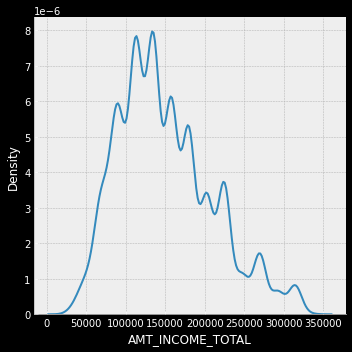

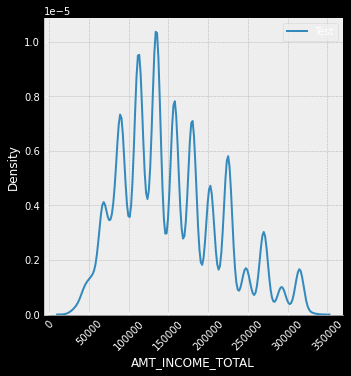

In [135]:
plt.figure(figsize=[20,15])
sns.displot(Target_Val_1_DF[Target_Val_1_DF['AMT_INCOME_TOTAL']< calcIQR(Target_Val_1_DF,'AMT_INCOME_TOTAL')['MaxOutlierThreshold']].AMT_INCOME_TOTAL,label='Test', kind='kde') 
sns.displot(Target_Val_0_DF[Target_Val_0_DF['AMT_INCOME_TOTAL']< calcIQR(Target_Val_0_DF,'AMT_INCOME_TOTAL')['MaxOutlierThreshold']].AMT_INCOME_TOTAL,label='Test', kind='kde') 
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain',axis='x')
plt.show()

- Comments: As there are spikes close to each other, observation is not up to the mark

## Previous Application Data Set

In [136]:
Bank_PrevAppData_DF= pd.read_csv('../Resources/CSV/previous_application.csv')

In [137]:
Bank_PrevAppData_DF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
Bank_PrevAppData_DF.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [139]:
Bank_PrevAppData_DF.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Categorial columns

In [140]:
print(Bank_PrevAppData_DF.select_dtypes(include='object').columns)
print('Number of Categorical Columns:',len(Bank_PrevAppData_DF.select_dtypes(include='object').columns))

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
Number of Categorical Columns: 16


In [141]:
print(Bank_PrevAppData_DF.select_dtypes(include=[np.number]).columns)
print('Number of Numerical columns',len(Bank_PrevAppData_DF.select_dtypes(include=[np.number]).columns))

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
Number of Numerical columns 21


## Handle Incorrect Data

In [142]:
Bank_PrevAppData_DF.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### Check Missing Values

In [143]:
Bank_PrevAppData_DF.isnull().values.sum()

11109336

In [144]:
print(Bank_PrevAppData_DF.columns[Bank_PrevAppData_DF.isnull().any()])
print('Length',len(Bank_PrevAppData_DF.columns[Bank_PrevAppData_DF.isnull().any()]))

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
Length 16


In [145]:
prev_null_count = Bank_PrevAppData_DF.isnull().sum()
prev_null_percentage = round((Bank_PrevAppData_DF.isnull().sum()/Bank_PrevAppData_DF.shape[0])*100, 2)

In [146]:
prev_null_df = pd.DataFrame({'column_name' : Bank_PrevAppData_DF.columns,'prev_null_count' : prev_null_count,'prev_null_percentage': prev_null_percentage})
prev_null_df.reset_index(drop = True, inplace = True)

In [147]:
prev_null_df.sort_values(by = 'prev_null_percentage', ascending = False)

,column_name,prev_null_count,prev_null_percentage
14,RATE_INTEREST_PRIVILEGED,1664263,99.64
13,RATE_INTEREST_PRIMARY,1664263,99.64
12,RATE_DOWN_PAYMENT,895844,53.64
6,AMT_DOWN_PAYMENT,895844,53.64
20,NAME_TYPE_SUITE,820405,49.12
36,NFLAG_INSURED_ON_APPROVAL,673065,40.30
31,DAYS_FIRST_DRAWING,673065,40.30
32,DAYS_FIRST_DUE,673065,40.30
33,DAYS_LAST_DUE_1ST_VERSION,673065,40.30
34,DAYS_LAST_DUE,673065,40.30


In [148]:
columns_to_be_deleted = prev_null_df[prev_null_df['prev_null_percentage'] > 40].column_name.to_list()

In [149]:
Bank_PrevAppData_DF.drop(columns = columns_to_be_deleted, inplace = True)